# Image I/O and manipulation

Working with images is a common task in computer graphics. SlangPy provides the [<code>Bitmap</code>][1] class for common image related tasks including:
- Reading/writing images from/to files in various file formats (PNG, JPEG, EXR and more).
- Converting images between different formats.
- Accessing/manipulating the raw pixel data.

To start using the `Bitmap` class, we first import `slangpy`:

[1]: ../api_reference.html#slangpy.Bitmap

In [1]:
import slangpy as spy

## Reading images from disk

`Bitmap` supports reading and writing images in most common file formats, including:

- JPEG (using [libjpeg-turbo][1])
- PNG (using [libpng][2])
- BMP, TGA and HDR (using [stb_image][3])
- EXR (using [OpenEXR][4])

Reading an image from disk is as simple as:

[1]: https://libjpeg-turbo.org/
[2]: http://www.libpng.org/pub/png/libpng.html
[3]: https://github.com/nothings/stb
[4]: https://www.openexr.com/



In [2]:
bmp = spy.Bitmap("images/vangogh.jpg")

Using the string representation of the `Bitmap` we can get more information about the image:

In [3]:
print(bmp)

Bitmap(
  pixel_format = rgb,
  component_type = uint8,
  width = 500,
  height = 400,
  srgb_gamma = true,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="R", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=0),
      Field(name="G", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=1),
      Field(name="B", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=2),
    ],
    size = 3,
    alignment = 1
  ),
  data = 585.94 kB
)


We can see the following information:

- `pixel_format`: Shows the format of the pixel data such as `rgb`, `rgba`, `multi_channel` and others (see [<code>Bitmap.PixelFormat</code>][1]).
- `component_type`: Shows the type of each pixel component such as `uint8`, `uint16`, `float32` and others (see [<code>Bitmap.ComponentType</code>][2]).
- `width` and `height`: Shows the dimensions of the image in pixels.
- `srgb_gamma`: Shows if the image data is interpreted as sRGB gamma corrected.
- `pixel_struct`: Shows the raw structure of the underlying pixel data (see [<code>DataStruct</code>][3]).
- `data`: Shows the size of the raw image data.

Images loaded from JPEG or PNG files are by default treated as sRGB gamma corrected. Other formats are treated as linear.

To load multiple images in parallel, you can use [`Bitmap.read_multiple()`][4].

For convenience, if a `Bitmap` is used as a cell output in Jupyter notebooks, it will be displayed as an image:

[1]: ../api_reference.html#slangpy.Bitmap.PixelFormat
[2]: ../api_reference.html#slangpy.Bitmap.ComponentType
[3]: ../api_reference.html#slangpy.DataStruct
[4]: ../api_reference.html#slangpy.Bitmap.read_multiple

In [4]:
bmp

Bitmap(
  pixel_format = rgb,
  component_type = uint8,
  width = 500,
  height = 400,
  srgb_gamma = true,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="R", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=0),
      Field(name="G", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=1),
      Field(name="B", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=2),
    ],
    size = 3,
    alignment = 1
  ),
  data = 585.94 kB
)

**Note**: Images are encoded as PNG files when displayed in Jupyter notebooks. This means that HDR image are first converted to LDR before being displayed.

## Converting images

Images can be converted into different formats using the [<code>Bitmap.convert()</code>][1] method. For example, to convert the loaded image into a floating point image in linear space, we can do:

[1]: ../api_reference.html#slangpy.Bitmap.convert

In [5]:
bmp_float = bmp.convert(component_type=spy.Bitmap.ComponentType.float32, srgb_gamma=False)
print(bmp_float)

Bitmap(
  pixel_format = rgb,
  component_type = float32,
  width = 500,
  height = 400,
  srgb_gamma = false,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="R", type=float32, flags=none, size=4, offset=0),
      Field(name="G", type=float32, flags=none, size=4, offset=4),
      Field(name="B", type=float32, flags=none, size=4, offset=8),
    ],
    size = 12,
    alignment = 1
  ),
  data = 2.29 MB
)


As another example, we can convert the image to RGBA (defaulting alpha to fully opaque), preserving the component type and sRGB gamma:

In [6]:
bmp_rgba = bmp.convert(pixel_format=spy.Bitmap.PixelFormat.rgba)
print(bmp_rgba)

Bitmap(
  pixel_format = rgba,
  component_type = uint8,
  width = 500,
  height = 400,
  srgb_gamma = true,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="R", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=0),
      Field(name="G", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=1),
      Field(name="B", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=2),
      Field(name="A", type=uint8, flags=normalized, size=1, offset=3),
    ],
    size = 4,
    alignment = 1
  ),
  data = 781.25 kB
)


As a final example, let's convert the image to a linear 16-bit luminance image:

In [7]:
bmp_y = bmp.convert(
    pixel_format=spy.Bitmap.PixelFormat.y,
    component_type=spy.Bitmap.ComponentType.uint16,
    srgb_gamma=False,
)
print(bmp_y)
bmp_y

Bitmap(
  pixel_format = y,
  component_type = uint16,
  width = 500,
  height = 400,
  srgb_gamma = false,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="Y", type=uint16, flags=normalized, size=2, offset=0),
    ],
    size = 2,
    alignment = 1
  ),
  data = 390.62 kB
)


Bitmap(
  pixel_format = y,
  component_type = uint16,
  width = 500,
  height = 400,
  srgb_gamma = false,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="Y", type=uint16, flags=normalized, size=2, offset=0),
    ],
    size = 2,
    alignment = 1
  ),
  data = 390.62 kB
)

## Array Interface

The `Bitmap` class implements the NumPy [array interface][1], which allows for seamless integration with other Python libraries.

For example, we can display an image using `matplotlib`:

[1]: https://numpy.org/doc/stable/reference/arrays.interface.html

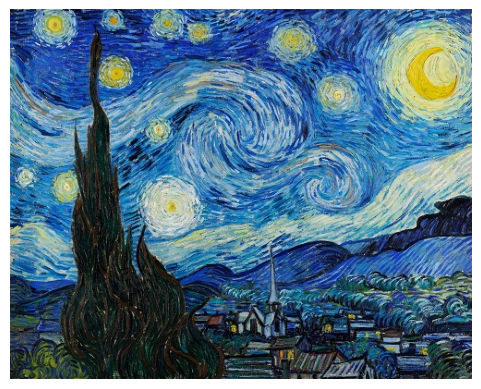

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(bmp)
plt.axis("off")


Bitmaps can easily be converted to NumPy arrays:

In [9]:
import numpy as np

bmp_np = np.array(bmp)
type(bmp_np), bmp_np.shape, bmp_np.dtype

(numpy.ndarray, (400, 500, 3), dtype('uint8'))

Note that the above conversion will create a copy of the pixel data. You can set `copy=False` to avoid the copy and reference the underlying data directly:

In [10]:
bmp_np = np.array(bmp, copy=False)

This allows manipulating the image data using NumPy operations:

In [11]:
bmp_np[75:125,75:425,:] = [255,0,0]
bmp_np[175:225,75:425,:] = [0,255,0]
bmp_np[275:325,75:425,:] = [0,0,255]
bmp

Bitmap(
  pixel_format = rgb,
  component_type = uint8,
  width = 500,
  height = 400,
  srgb_gamma = true,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="R", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=0),
      Field(name="G", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=1),
      Field(name="B", type=uint8, flags=(normalized | srgb_gamma), size=1, offset=2),
    ],
    size = 3,
    alignment = 1
  ),
  data = 585.94 kB
)

Of course, bitmaps can also be created directly from NumPy arrays:

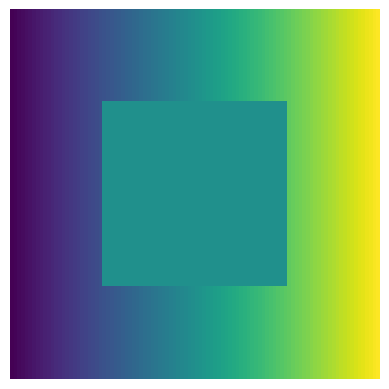

In [12]:
bmp_np = np.tile(np.linspace(0, 1, 100, dtype=np.float32), (100, 1))
bmp_np[25:75,25:75] = 0.5
bmp = spy.Bitmap(bmp_np)

plt.imshow(bmp)
plt.axis("off")

## Multi-channel images

The `Bitmap` class supports multi-channel images. This is most useful for working with EXR files, which can contain an arbitrary number of channels.

To create a multi-channel bitmap, we have to pass a set of channel names.

In [13]:
bmp_np = np.zeros((256, 256, 7), dtype=np.float32)
bmp_multi = spy.Bitmap(
    bmp_np,
    channel_names=[
        "color.R",
        "color.G",
        "color.B",
        "normal.R",
        "normal.G",
        "normal.B",
        "depth.T",
    ],
)
bmp_multi

Bitmap(
  pixel_format = multi_channel,
  component_type = float32,
  width = 256,
  height = 256,
  srgb_gamma = false,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="color.R", type=float32, flags=none, size=4, offset=0),
      Field(name="color.G", type=float32, flags=none, size=4, offset=4),
      Field(name="color.B", type=float32, flags=none, size=4, offset=8),
      Field(name="normal.R", type=float32, flags=none, size=4, offset=12),
      Field(name="normal.G", type=float32, flags=none, size=4, offset=16),
      Field(name="normal.B", type=float32, flags=none, size=4, offset=20),
      Field(name="depth.T", type=float32, flags=none, size=4, offset=24),
    ],
    size = 28,
    alignment = 1
  ),
  data = 1.75 MB
)

We can split the multi-channel bitmap into its individual parts using the [<code>Bitmap.split()</code>][1] method. It groups the channels by their common prefix and tries infer the correct pixel format. The parts are returned as a list of tuples, containing the prefix name and the bitmap.

[1]: ../api_reference.html#slangpy.Bitmap.split

In [14]:
parts = bmp_multi.split()
print([(part[0], part[1].pixel_format) for part in parts])

[('color', PixelFormat.rgb), ('depth', PixelFormat.multi_channel), ('normal', PixelFormat.rgb)]


The following example loads a multi-channel EXR image and displays some of its parts side-by-side:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..18.773415].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Bitmap(
  pixel_format = multi_channel,
  component_type = float32,
  width = 256,
  height = 256,
  srgb_gamma = false,
  pixel_struct = Struct(
    pack = true,
    byte_order = little_endian,
    fields = [
      Field(name="R", type=float32, flags=none, size=4, offset=0),
      Field(name="G", type=float32, flags=none, size=4, offset=4),
      Field(name="B", type=float32, flags=none, size=4, offset=8),
      Field(name="depth.T", type=float32, flags=none, size=4, offset=12),
      Field(name="image.R", type=float32, flags=none, size=4, offset=16),
      Field(name="image.G", type=float32, flags=none, size=4, offset=20),
      Field(name="image.B", type=float32, flags=none, size=4, offset=24),
      Field(name="image.A", type=float32, flags=none, size=4, offset=28),
      Field(name="position.X", type=float32, flags=none, size=4, offset=32),
      Field(name="position.Y", type=float32, flags=none, size=4, offset=36),
      Field(name="position.Z", type=float32, flags=none, size=4, 

Text(0.5, 1.0, 'depth')

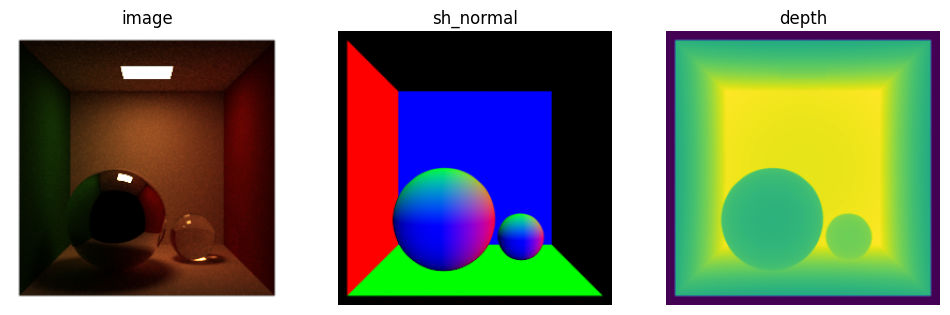

In [15]:
bmp_multi = spy.Bitmap("images/multi_channel.exr")
print(bmp_multi)

parts = dict(bmp_multi.split())

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(parts["image"])
axs[0].axis("off")
axs[0].set_title("image")
axs[1].imshow(parts["sh_normal"])
axs[1].axis("off")
axs[1].set_title("sh_normal")
axs[2].imshow(parts["depth"])
axs[2].axis("off")
axs[2].set_title("depth")

## Writing images to disk

Writing images to disk is a simple as reading them. For example, to load a JPEG and save it as a PNG, we can simply do:

In [16]:
bmp = spy.Bitmap("images/vangogh.jpg")
bmp.write("vangogh.png")

Note that different file formats support different pixel formats and component types. For example, JPEG only supports `rgb` and `rgba` pixel formats with `uint8` component type. You have to convert the image to the correct format before saving it.

Bitmaps can also be written asynchronously using the [<code>Bitmap.write_async()</code>][1] method.

[1]: ../api_reference.html#slangpy.Bitmap.write_async

### See also

- [<code>slangpy.Bitmap</code>][1]

[1]: ../api_reference.html#slangpy.Bitmap
